In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score

## Import Dataset with generated labels and with true labels

In [44]:
dev_labeled = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Experiments/End_Model_Performances/1_Full/labeled_df_dev_threshold_None.csv')
## Plot confusion matrices - dev Set

In [45]:
def generate_train_dev_test_split(df):
    """
    Generate train dev test split
    :param df: Dataset to split
    :type df: DataFrame
    :return: Returns three datasets
    :rtype: DataFrame, DataFrame, DataFrame
    """

    # Split into 60% train, 20% dev and 20% test
    rest, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df.POPULIST)
    train, dev = train_test_split(rest, test_size=0.1, random_state=42, shuffle=True, stratify=rest.POPULIST)

    return train, dev, test

In [46]:
nccr_df_prep = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Output/NCCR_combined_corpus_DE_wording_available_prep.csv')

# Generate Train, Dev, Test Split
train, dev, test = generate_train_dev_test_split(nccr_df_prep)

In [47]:
# Merge labeled df with true labels
dev_labeled.set_index('Unnamed: 0', inplace=True)
merged_df = dev_labeled.join(dev)
merged_df

,content,label,ID,text,Coder,#TS,#TS2,Codierstart_Lab,Medium,Author,...,text_prep,party,year,wording_matches,wording_sentence,wording_segments,match_count,Wording_sent_count,Unnamed: 0,ID_non
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
263,Budget. Die Österreichische Volkspartei ist üb...,1,au_pm_el_94_40004.txt,Text ID:\nau_pm_el_94_40004.txt\n\nParty Manif...,stbu,1.405520e+09,1.405524e+09,Wed Jul 16 16:17:25 2014,1160,2.0,...,Der Erhard Busek Wirtschaftsplan. 1. Wirtschaf...,ovp,1994,"[(1212883764967918647, 15, 33)]",[['Die Österreichische Volkspartei ist überzeu...,Budget. Die Österreichische Volkspartei ist üb...,1,1,NaN,NaN
297,Dass Rechtsextreme und Neonazis in der FPÖ ihr...,1,au_pr_el_13_010003.txt,Text-ID: at_pr_el_13_010003.txt\n\nPress Relea...,pagr,1.424939e+09,1.424940e+09,Thu Feb 26 09:26:01 2015,1150,2.0,...,Hitlergruß beim Wahlkampffinale der FPÖ - ein ...,spo,2013,"[(1212883764967918647, 188, 200)]",[['Die FPÖ darf daher auf keinen Fall in die R...,Dass Rechtsextreme und Neonazis in der FPÖ ihr...,1,1,NaN,NaN
3127,Die SPD hingegen hat sich intensiv für die Ums...,1,de_pr_el_13_061277.txt,Text-ID: de_pr_el_13_061277.txt\n\nPress Relea...,nibr,1.435049e+09,1.435049e+09,Tue Jun 23 10:35:40 2015,1550,2.0,...,Zu dem nun veröffentlichten Behindertenbericht...,spd,2013,"[(1212883764967918647, 285, 288)]",[['Stattdessen wurden von CDUCSU und FDP im Bu...,Die SPD hingegen hat sich intensiv für die Ums...,1,1,NaN,NaN
2667,SPD und Grüne stehen hingegen zur Energiewende...,1,de_pr_el_13_040017.txt,Text-ID: de_pr_el_13_040017.txt\n\nPress Relea...,rakr,1.417358e+09,1.417360e+09,Sun Nov 30 15:39:53 2014,1550,2.0,...,Zum Energiekonzept von Peer Steinbrück und Mat...,grune,2013,"[(1212883764967918647, 53, 56)]",[['Das Konzept von Peer Steinbrück zeigt deutl...,SPD und Grüne stehen hingegen zur Energiewende...,1,1,NaN,NaN
1746,Zudem soll das Fahrzeuggewicht bei der Berechn...,1,cd_pr_el_11_050039.txt,Text-ID: cd_pr_el_11_050039.txt\n\nPress Relea...,pagr,1.417085e+09,1.417085e+09,Thu Nov 27 11:40:42 2014,1350,2.0,...,Text-ID: cd_pr_el_11_050039.txt Press Release ...,grune,2011,"[(1212883764967918647, 221, 253)]",[['Erfolg fr die Stopp-Offroader-Initiative Au...,Zudem soll das Fahrzeuggewicht bei der Berechn...,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,"Die EU kündigt an, dass der bilaterale Weg für...",1,cd_pm_el_11_70005.txt,Text ID:\ncd_pm_el_11_70005.txt\n\nParty Manif...,andi,1.413215e+09,1.413219e+09,Mon Oct 13 17:39:13 2014,1360,2.0,...,AUSSENPOLITIK Kein EU -Beitritt Das Ziel der S...,svp,2011,[],[],"Die EU kündigt an, dass der bilaterale Weg für...",-1,2,NaN,NaN
2980,"Kunert weiter: ""Bundesinnenministerium und DOS...",1,de_pr_el_13_051101.txt,Text-ID: de_pr_el_13_051101.txt\n\nPress Relea...,nibr,1.429732e+09,1.429733e+09,Wed Apr 22 21:51:49 2015,1550,2.0,...,"NA Berlin (ots) - ""Nach der Teil-Veröffentlich...",dielinke,2013,"[(1212883764967918647, 89, 91)]",[['Bundesinnenminister Friedrich verschleppt d...,"Kunert weiter: ""Bundesinnenministerium und DOS...",1,1,NaN,NaN
369,Gemeinsame Schule und Ganztagsschule ausbauen ...,1,au_pr_el_13_010112.txt,Text-ID: at_pr_el_13_010112.txt\n\nPress Relea...,pagr,1.431422e+09,1.431422e+09,Tue May 12 11:14:30 2015,1150,2.0,...,Gemeinsame Schule und Ganztagsschule ausbauen ...,spo,2013,"[(1212883764967918647, 69, 121)]","[['Kuntzl warnt davor, die österreichische Ent...",Gemeinsame Schule und Ganztagsschule ausbauen ...,1,1,NaN,NaN


## Plot confusion matrices - Dev Set

### Overall

In [48]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

In [49]:
y_true = merged_df.POPULIST
y_pred = merged_df.label
cm = confusion_matrix(y_true, y_pred)
display_labels = [0,1]

In [50]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       189
         1.0       0.32      1.00      0.48        88

    accuracy                           0.32       277
   macro avg       0.16      0.50      0.24       277
weighted avg       0.10      0.32      0.15       277



C:\Users\dschw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dschw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dschw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


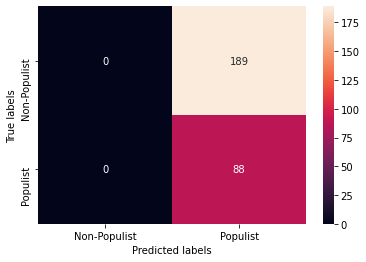

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['Non-Populist', 'Populist']); ax.yaxis.set_ticklabels(['Non-Populist', 'Populist']);
plt.savefig('images/cm_label_model_no_thres_all.svg')

### Per dimension (AE,PC,Sov)

In [52]:
merged_df_pc = merged_df.loc[merged_df.POPULIST_PeopleCent == 1]
merged_df_ae = merged_df.loc[merged_df.POPULIST_AntiElite == 1]
merged_df_sov = merged_df.loc[merged_df.POPULIST_Sovereign == 1]
merged_df_sov['POPULIST'] = merged_df_sov.POPULIST.astype(int)
merged_df_sov['label'] = merged_df_sov.label.astype(int)

<ipython-input-52-56a9a00bf5e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_sov['POPULIST'] = merged_df_sov.POPULIST.astype(int)
<ipython-input-52-56a9a00bf5e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_sov['label'] = merged_df_sov.label.astype(int)


In [53]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [54]:
def plot_cm(df, name):
    
    y_true = df.POPULIST
    y_pred = df.label
    
    cm = confusion_matrix(y_true, y_pred)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix '+ name); 
    ax.xaxis.set_ticklabels(['non-populist', 'populist']); ax.yaxis.set_ticklabels(['non-populist', 'populist']);
    plt.savefig('images/cm_label_model_' + name + '.png')

In [55]:
def plot_cm_sgl(df, name):
    
    y_true = df.POPULIST
    y_pred = df.label
    
    cm = confusion_matrix(y_true, y_pred)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix '+ name); 
    ax.xaxis.set_ticklabels(['populist']); ax.yaxis.set_ticklabels(['populist']);
    plt.savefig('images/cm_label_model_' + name + '.png')


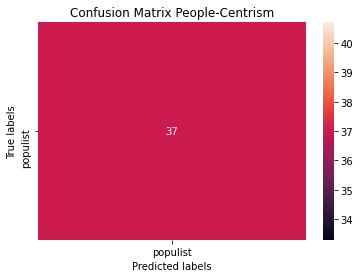

In [56]:
plot_cm_sgl(merged_df_pc, 'People-Centrism')

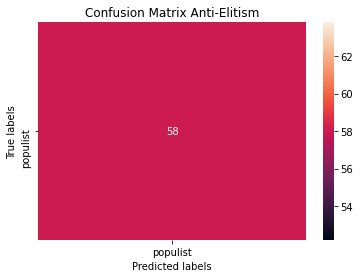

In [57]:
plot_cm_sgl(merged_df_ae, 'Anti-Elitism')

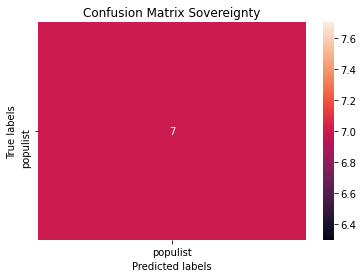

In [58]:
plot_cm_sgl(merged_df_sov, 'Sovereignty')

## Quantity Threshold

In [59]:
dev_labeled_qty = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Experiments/End_Model_Performances/2_Threshold_Quantity/labeled_df_dev_threshold_qty.csv')
## Plot confusion matrices - dev Set

In [60]:
# Merge labeled df with true labels
dev_labeled_qty.set_index('Unnamed: 0', inplace=True)
merged_df = dev_labeled_qty.join(dev)
merged_df

,content,label,ID,text,Coder,#TS,#TS2,Codierstart_Lab,Medium,Author,...,text_prep,party,year,wording_matches,wording_sentence,wording_segments,match_count,Wording_sent_count,Unnamed: 0,ID_non
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
263,Budget. Die Österreichische Volkspartei ist üb...,0,au_pm_el_94_40004.txt,Text ID:\nau_pm_el_94_40004.txt\n\nParty Manif...,stbu,1.405520e+09,1.405524e+09,Wed Jul 16 16:17:25 2014,1160,2.0,...,Der Erhard Busek Wirtschaftsplan. 1. Wirtschaf...,ovp,1994,"[(1212883764967918647, 15, 33)]",[['Die Österreichische Volkspartei ist überzeu...,Budget. Die Österreichische Volkspartei ist üb...,1,1,NaN,NaN
297,Dass Rechtsextreme und Neonazis in der FPÖ ihr...,0,au_pr_el_13_010003.txt,Text-ID: at_pr_el_13_010003.txt\n\nPress Relea...,pagr,1.424939e+09,1.424940e+09,Thu Feb 26 09:26:01 2015,1150,2.0,...,Hitlergruß beim Wahlkampffinale der FPÖ - ein ...,spo,2013,"[(1212883764967918647, 188, 200)]",[['Die FPÖ darf daher auf keinen Fall in die R...,Dass Rechtsextreme und Neonazis in der FPÖ ihr...,1,1,NaN,NaN
3127,Die SPD hingegen hat sich intensiv für die Ums...,0,de_pr_el_13_061277.txt,Text-ID: de_pr_el_13_061277.txt\n\nPress Relea...,nibr,1.435049e+09,1.435049e+09,Tue Jun 23 10:35:40 2015,1550,2.0,...,Zu dem nun veröffentlichten Behindertenbericht...,spd,2013,"[(1212883764967918647, 285, 288)]",[['Stattdessen wurden von CDUCSU und FDP im Bu...,Die SPD hingegen hat sich intensiv für die Ums...,1,1,NaN,NaN
2667,SPD und Grüne stehen hingegen zur Energiewende...,0,de_pr_el_13_040017.txt,Text-ID: de_pr_el_13_040017.txt\n\nPress Relea...,rakr,1.417358e+09,1.417360e+09,Sun Nov 30 15:39:53 2014,1550,2.0,...,Zum Energiekonzept von Peer Steinbrück und Mat...,grune,2013,"[(1212883764967918647, 53, 56)]",[['Das Konzept von Peer Steinbrück zeigt deutl...,SPD und Grüne stehen hingegen zur Energiewende...,1,1,NaN,NaN
1746,Zudem soll das Fahrzeuggewicht bei der Berechn...,0,cd_pr_el_11_050039.txt,Text-ID: cd_pr_el_11_050039.txt\n\nPress Relea...,pagr,1.417085e+09,1.417085e+09,Thu Nov 27 11:40:42 2014,1350,2.0,...,Text-ID: cd_pr_el_11_050039.txt Press Release ...,grune,2011,"[(1212883764967918647, 221, 253)]",[['Erfolg fr die Stopp-Offroader-Initiative Au...,Zudem soll das Fahrzeuggewicht bei der Berechn...,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,"Die EU kündigt an, dass der bilaterale Weg für...",0,cd_pm_el_11_70005.txt,Text ID:\ncd_pm_el_11_70005.txt\n\nParty Manif...,andi,1.413215e+09,1.413219e+09,Mon Oct 13 17:39:13 2014,1360,2.0,...,AUSSENPOLITIK Kein EU -Beitritt Das Ziel der S...,svp,2011,[],[],"Die EU kündigt an, dass der bilaterale Weg für...",-1,2,NaN,NaN
2980,"Kunert weiter: ""Bundesinnenministerium und DOS...",0,de_pr_el_13_051101.txt,Text-ID: de_pr_el_13_051101.txt\n\nPress Relea...,nibr,1.429732e+09,1.429733e+09,Wed Apr 22 21:51:49 2015,1550,2.0,...,"NA Berlin (ots) - ""Nach der Teil-Veröffentlich...",dielinke,2013,"[(1212883764967918647, 89, 91)]",[['Bundesinnenminister Friedrich verschleppt d...,"Kunert weiter: ""Bundesinnenministerium und DOS...",1,1,NaN,NaN
369,Gemeinsame Schule und Ganztagsschule ausbauen ...,0,au_pr_el_13_010112.txt,Text-ID: at_pr_el_13_010112.txt\n\nPress Relea...,pagr,1.431422e+09,1.431422e+09,Tue May 12 11:14:30 2015,1150,2.0,...,Gemeinsame Schule und Ganztagsschule ausbauen ...,spo,2013,"[(1212883764967918647, 69, 121)]","[['Kuntzl warnt davor, die österreichische Ent...",Gemeinsame Schule und Ganztagsschule ausbauen ...,1,1,NaN,NaN


In [61]:
y_true = merged_df.POPULIST
y_pred = merged_df.label
cm = confusion_matrix(y_true, y_pred)
display_labels = [0,1]

In [62]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.97      0.81       189
         1.0       0.62      0.09      0.16        88

    accuracy                           0.69       277
   macro avg       0.66      0.53      0.49       277
weighted avg       0.67      0.69      0.60       277



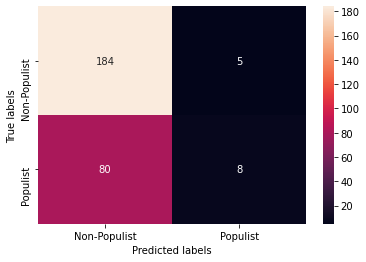

In [63]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['Non-Populist', 'Populist']); ax.yaxis.set_ticklabels(['Non-Populist', 'Populist']);
plt.savefig('images/cm_label_model_qty_thres_all.svg')

## Probability Threshold

### Generate P-R-Curve

In [64]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [65]:
train_prob = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Experiments/End_Model_Performances/1_Full/probs_train_filtered.csv')
dev_prob = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Experiments/End_Model_Performances/1_Full/probs_dev_filtered.csv')

In [66]:
train_prob = train_prob['1'].to_list()
dev_prob = dev_prob['1'].to_list()

In [67]:
tpr, fpr, thresholds = roc_curve(dev.POPULIST.to_list(),dev_prob)

In [68]:
precision, recall, thresholds = precision_recall_curve(dev.POPULIST.to_list(),dev_prob)

In [69]:
optimal_idx = np.argmax(tpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.9997031956354656

In [70]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

<ipython-input-70-91086b880fad>:2: RuntimeWarning: invalid value encountered in true_divide
  fscore = (2 * precision * recall) / (precision + recall)


In [71]:
fscore = np.nan_to_num(fscore)

In [72]:
# locate the index of the largest f score
ix = np.argmax(fscore)

In [73]:
precision[ix]

0.36633663366336633

In [74]:
fscore[ix]

0.5103448275862069

In [75]:
thresholds[ix]

0.9790379910236866

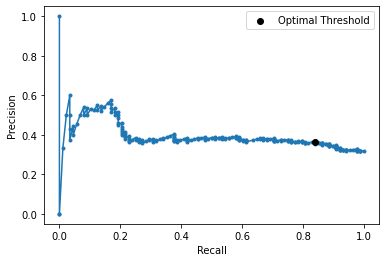

In [76]:
plt.plot(recall, precision, marker='.', zorder=-1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.scatter(recall[ix], precision[ix], zorder=1, marker='o', color='black', label='Optimal Threshold')
plt.legend()
plt.savefig('images/p-r-curve.svg')

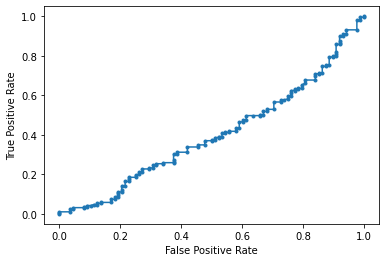

In [77]:
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.savefig('images/roc_curve.png')

In [78]:
dev_labeled_prob = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Experiments/End_Model_Performances/3_Threshold_Probability/labeled_df_dev_threshold_prob.csv')
## Plot confusion matrices - dev Set

In [79]:
# Merge labeled df with true labels
dev_labeled_prob.set_index('Unnamed: 0', inplace=True)
merged_df = dev_labeled_prob.join(dev)

In [80]:
y_true = dev.POPULIST.astype(int).to_list()
y_pred = dev_labeled_prob.label.to_list()
cm = confusion_matrix(y_true, y_pred)
display_labels = [0,1]

In [81]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.32      0.46       189
           1       0.37      0.84      0.51        88

    accuracy                           0.49       277
   macro avg       0.59      0.58      0.49       277
weighted avg       0.67      0.49      0.48       277



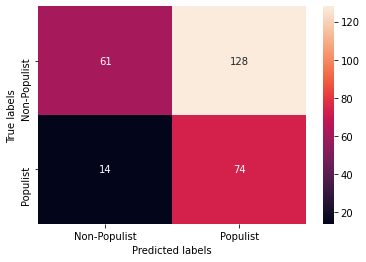

In [82]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['Non-Populist', 'Populist']); ax.yaxis.set_ticklabels(['Non-Populist', 'Populist']);
plt.savefig('images/cm_label_model_prob_thres_all.svg')